# Linear Regression #
The aim of this project is to decide whether or not an ecommerce clothing company should focus on improving their mobile app or website, through the use of a linear regression model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
sns.set_style("darkgrid")

In [2]:
customers = pd.read_csv("Ecommerce Customers")
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Exploratory Data Analysis ###

C:\Users\Karthik\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


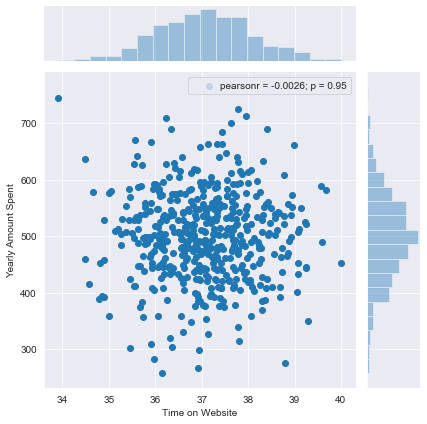

In [5]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=customers).annotate(stats.pearsonr)

There appears to be a very low correlation between time spend on the website and yearly amount spent

C:\Users\Karthik\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


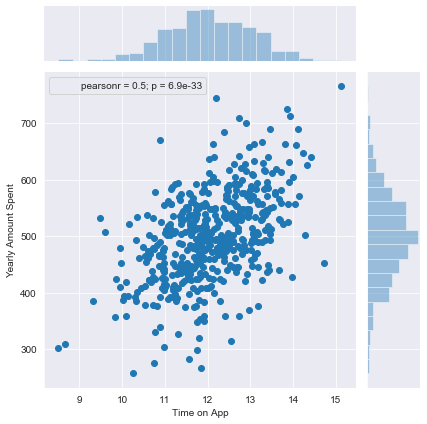

In [6]:
sns.jointplot(x="Time on App",y="Yearly Amount Spent", data=customers).annotate(stats.pearsonr)

There appears to be more of a positive correlation between time on the app and yearly amount spent.

C:\Users\Karthik\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


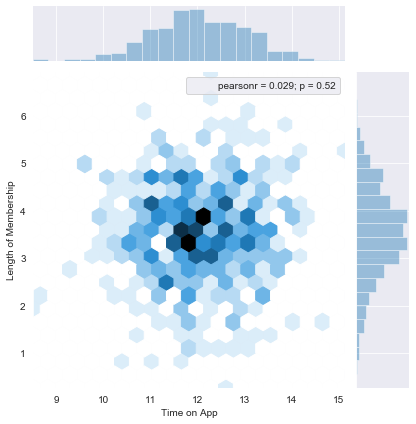

In [7]:
sns.jointplot(x="Time on App",y="Length of Membership",data=customers,kind="hex").annotate(stats.pearsonr)

There doesn't seem to be very much correlation between length of membership and time on app.

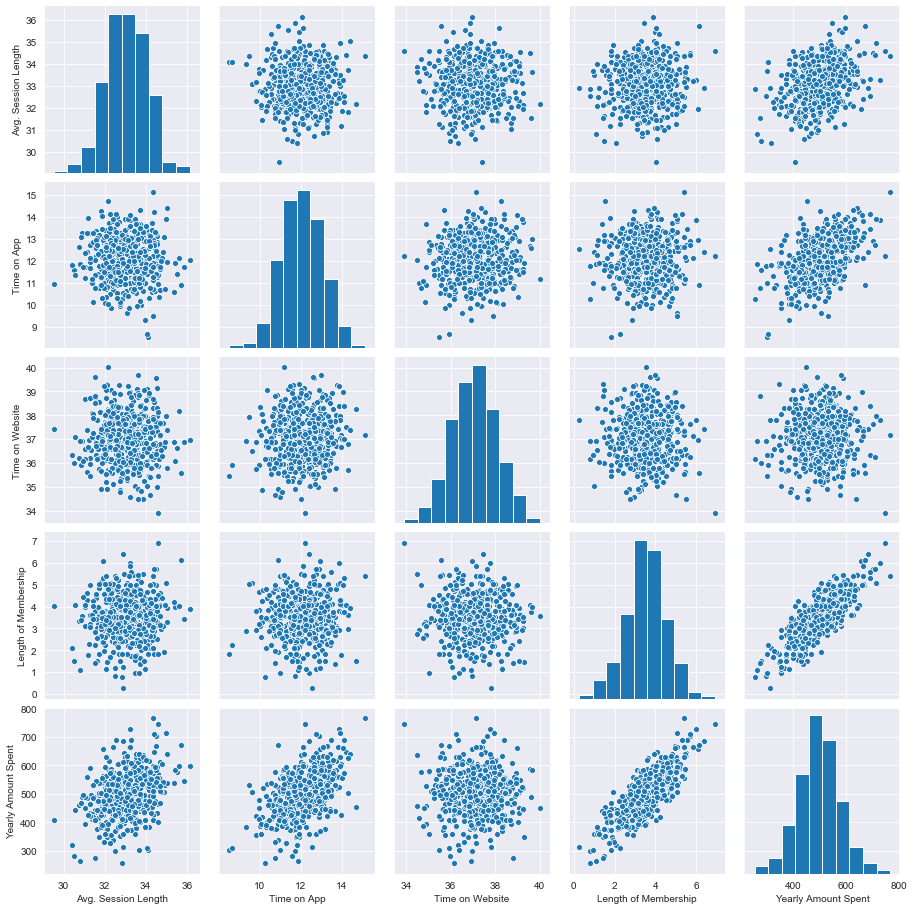

In [8]:
sns.pairplot(customers)

Based off the above pairplot, length of membership appears to have the highest correlation with yearly amount spent.

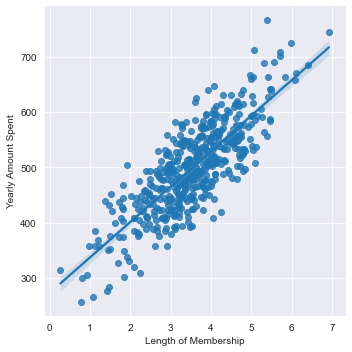

In [9]:
sns.lmplot(
    x="Length of Membership",y="Yearly Amount Spent",data=customers)

### Building the linear regression model ###
Now that we've done the EDA, it's time to build the LR model.
<br> First, we'll create a train-test split

In [10]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [11]:
X = customers[["Avg. Session Length","Time on App","Time on Website","Length of Membership"]]
y = customers["Yearly Amount Spent"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

### Training the model ###

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print(lm.coef_)
#these are the coefficients of our model for each column in X_test

[25.91225933 38.50812563  0.28871629 61.16161032]


In [18]:
predictions = lm.predict(X_test)

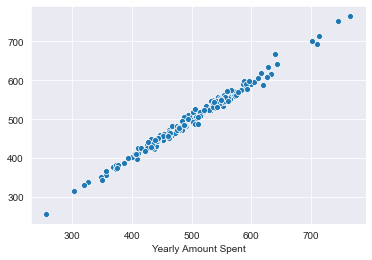

In [19]:
sns.scatterplot(y_test,predictions)

The model seems to be fairly close to the real test values with its predicted values

### Evaluating the model ###

In [20]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.294546588331311
MSE: 81.90726984520938
RMSE: 9.050263523522913


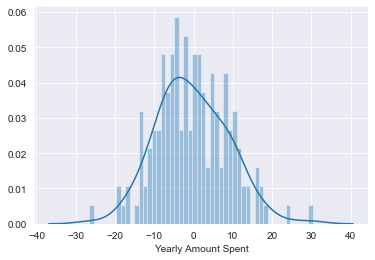

In [21]:
#plotting the residuals
#they should appear as a normal distribution
sns.distplot((y_test-predictions),bins=50)

From all the metrics used to evaluate our model performance, it seems to perform reasonably well.

### Conclusions ###
What can we draw from our model to help answer our original questions?

In [22]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=["Coefficient"])
coeff_df

,Coefficient
Avg. Session Length,25.912259
Time on App,38.508126
Time on Website,0.288716
Length of Membership,61.161610


* Based on these coefficients, the company can either focus on investing on their website and improving its lagging performance. 
* The company could alternatively focus their efforts on their app and improve it's performance which is already working for them.